In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S2/Office_Cristina-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
len(train_data),len(test_data)

(3600, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (298, 24, 1)
y_train.shape =  (298, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(12))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
Total params: 2,796
Trainable params: 2,796
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 2s 15ms/step - loss: 12.7571
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 12.2878
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 11.8237
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 11.3769
Epoch 5/300
3/3 [==============================] - 0s 13ms/step - loss: 10.9502
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 10.5408
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 10.1383
Epoch 8/300
3/3 [==============================] - 0s 13ms/step - loss: 9.7395
Epoch 9/300
3/3 [==============================] - 0s 12ms/step - loss: 9.3409
Epoch 10/300
3/3 [==============================] - 0s 12ms/step - loss: 8.9358
Epoch 11/300
3/3 [==============================] - 0s 13ms/step - loss: 8.5383
Epoch 12/300
3/3 [==============================] - 0s 15ms/step - loss: 8.1456
Epoch 13/300
3/3 [========================

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 0.7914225737468717
Root Mean Squared Error for LSTM Model for testing is: 0.8278837134807748
Mean Absolute Error for LSTM Model for training is: 0.6138292992777682
Mean Absolute Error for LSTM Model for testing is: 0.6563470166901827
MAPE for LSTM Model for training is: 0.1986758292472809
MAPE for LSTM Model for testing is: 0.27058763582767936


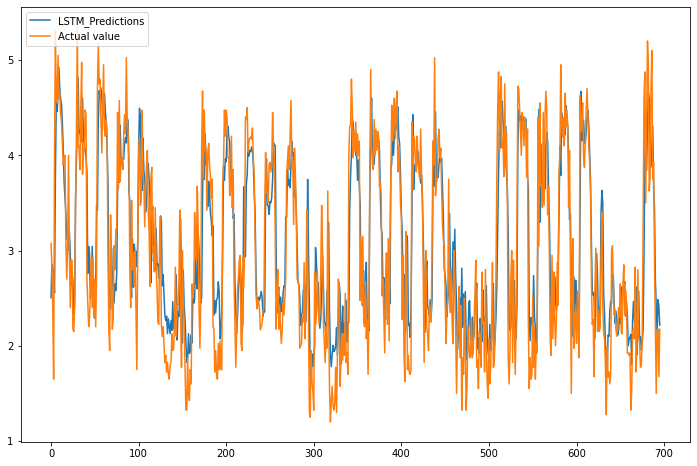

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.07500005]), array([2.5058556], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.56914449]), array([-0.00098276]), array([-0.44855428]), array([-1.14345324]), array([1.44418931]), array([1.53829169]), array([0.02010727]), array([0.08854485]), array([0.41455412]), array([-0.32137108]), array([-0.04764462]), array([-0.16584253]), array([-0.18376589]), array([-0.20484161]), array([-0.1600976]), array([0.26513195]), array([0.45899415]), array([-0.31225824]), array([-0.42169285]), array([-0.20174527]), array([0.99747396]), array([-0.19706893]), array([-0.55821204]), array([0.27245069]), array([0.13442206]), array([-0.50369787]), array([-0.18324542]), array([-0.05333567]), array([-0.13493991]), array([0.26967645]), array([1.11812067]), array([-0.68804693]), array([-0.15308332]), array([-0.41304588]), array([0.36316919]), array([0.59468269]), array([-0.79998565]), array([-0.14992666]), array([-0.02127838]), array([0.42318726]), array([0.45709157]), array([-1.13126326]), array([-0.30976915]), array([-0.84258604]), array([-0.60480738]), array([0.04770279]), array(

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.75402808]), array([-1.49025321]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(396, 300)